<a href="https://colab.research.google.com/github/ipeirotis/autoencoders_census/blob/main/Autoencoder_YRBSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd

In [156]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from pandas.api.types import is_numeric_dtype

## Load Dataset

In [157]:
dataset_url = "https://github.com/ipeirotis/autoencoders_census/raw/main/sadc_2017only_national_full.csv"
df = pd.read_csv(dataset_url)


In [158]:
df.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qnwenthungry,qnmusclestrength,qnsunscreenuse,qnindoortanning,qnsunburn,qnconcentrating,qncurrentasthma,qnwheresleep,qnspeakenglish,qntransgender
0,XX,United States (XX),National,3,2017,14,2.4095,111,171190,1509749,...,NaN,1.0,NaN,2.0,1.0,1.0,NaN,NaN,1.0,NaN
1,XX,United States (XX),National,3,2017,14,1.6614,212,170890,1509750,...,NaN,1.0,NaN,2.0,2.0,1.0,NaN,NaN,1.0,NaN
2,XX,United States (XX),National,3,2017,14,0.7049,212,170890,1509751,...,NaN,2.0,NaN,2.0,2.0,2.0,NaN,NaN,1.0,NaN
3,XX,United States (XX),National,3,2017,14,0.7966,212,170890,1509752,...,NaN,1.0,NaN,2.0,1.0,2.0,NaN,NaN,1.0,NaN
4,XX,United States (XX),National,3,2017,14,1.9776,202,160270,1509753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
columns_to_drop = ['sitecode', 'sitename', 'sitetype', 'sitetypenum', 'year', 'survyear', 'record', 'stratum', 'PSU']
df = df.drop(columns = columns_to_drop, axis='columns')

In [160]:
df1 = df.iloc[:, :100]
df1.head()

,weight,age,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,...,q82,q83,q84,q85,q86,q87,q88,q89,qn8,qn9
0,2.4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5 days,2 teams,2 times,No,More than 24 months ago,Yes,6 hours,Mostly B's,NaN,2.0
1,1.6614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5 days,0 teams,0 times,Not sure,During the past 12 months,No,4 or less hours,Mostly B's,NaN,2.0
2,0.7049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5 days,0 teams,0 times,No,During the past 12 months,Yes,7 hours,Mostly C's,NaN,1.0
3,0.7966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5 days,0 teams,0 times,No,During the past 12 months,No,8 hours,Mostly B's,NaN,1.0
4,1.9776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [161]:
lst = [216, 232, 242, 245, 247, 249, 251, 252, 253, 256]
df1 = pd.concat([df1, df.iloc[:, lst]], axis=1)
df1.head()

,weight,age,sex,grade,race4,race7,stheight,stweight,bmi,bmipct,...,qpropertydamage,qgenderexp,qsugardrink,qfoodallergy,qmusclestrength,qindoortanning,qconcentrating,qcurrentasthma,qwheresleep,qnbikehelmet
0,2.4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Not sure,3 days,0 times,Yes,NaN,NaN,NaN
1,1.6614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Not sure,4 days,0 times,Yes,NaN,NaN,NaN
2,0.7049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,1 day,0 times,No,NaN,NaN,NaN
3,0.7966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,3 days,0 times,No,NaN,NaN,NaN
4,1.9776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
dict1 = {
        'age': 'age',
        'sex': 'sex', 'grade':'grade','race4':'Hispanic_or_Latino','race7':'race',
       'qnobese':'obese','qnowt':'overweight','q67':'sexual_identity','q66':'sex/sexual_contacts',
       'sexid':'sexid','sexid2':'sexid2','sexpart':'sexpart','sexpart2':'sexpart2','q8':'seat_belt_use','q9':'riding_with_a_drinking_driver',
       'q10':'drinking_and_driving','q11':'texting_and_driving','q12':'weapon_carrying','q13':'weapon_carrying_at_school',
       'q14':'gun_carrying_past_12_mos','q15':'safety_concerns_at_school','q16':'threatened_at_school','q17':'physical_fighting',
       'q18':'physical_fighting_at_school','q19':'forced_sexual_intercourse','q20':'sexual_violence','q21':'sexual_dating_violence',
       'q22':'physical_dating_violence','q23':'bullying_at_school','q24':'electronic_bullying','q25':'sad_or_hopeless',
       'q26':'considered_suicide','q27':'made_a_suicide_plan','q28':'attempted_suicide','q29':'injurious_suicide_attempt',
       'q30':'ever_cigarette_use','q31':'initation_of_cigarette_smoking','q32':'current_cigarette_use','q33':'smoking_amounts_per_day',
       'q34':'electronic_vapor_product_use','q35':'current_electronic_vapor_product_use','q36':'EVP_from_store','q37':'current_smokeless_tobacco_use',
       'q38':'current_cigar_use','q39':'all_tobacco_product_cessation','q40':'ever_alcohol_use','q41':'initiation_of_alcohol_use',
       'q42':'current_alcohol_use','q43':'source_of_alcohol','q44':'current_binge_drinking','q45':'largest_number_of_drinks',
       'q46':'ever_marijuana_use','q47':'initiation_of_marijuana_use','q48':'current_marijuana_use','q49':'ever_cocaine_use',
       'q50':'ever_inhalant_use','q51':'ever_heroin_use','q52':'ever_methamphetamine_use','q53':'ever_ecstasy_use',
       'q54':'ever_synthetic_marijuana_use','q55':'ever_steroid_use','q56':'ever_prescription_pain_medicine_use','q57':'illegal_injected_drug_use',
       'q58':'illegal_drugs_at_school','q59':'ever_sexual_intercourse','q60':'first_sex_intercourse','q61':'multiple_sex_partners',
       'q62':'current_sexual_activity','q63':'alcohol/drugs_at_sex','q64':'condom_use','q65':'birth_control_pill_use',
       'q68':'perception_of_weight','q69':'weight_loss','q70':'fruit_juice_drinking','q71':'fruit_eating','q72':'green _salad_eating',
       'q73':'potato_eating','q74':'carrot_eating','q75':'other_vegetable_eating','q76':'soda_drinking','q77':'milk_drinking',
       'q78':'breakfast_eating','q79':'physical_activity','q80':'television_watching','q81':'computer_not_school_work_use',
        'q82':'PE_attendance','q83':'sports_team_participation','q84':'concussion_in_last_12_mos','q85':'HIV_testing','q86':'oral_health_care',
       'q87':'asthma','q88':'sleep_on_school_night','q89':'grades_in_school', 'qdrivemarijuana':'drive_when_using_marijuana',
       'qhallucdrug':'ever_used_LSD', 'qsportsdrink':'sports_drinks','qwater':'plain_water','qfoodallergy':'food_allergies',
        'qmusclestrength':'muscle_stregthening','qindoortanning':'indoor_tanning','qsunburn':'sunburn','qconcentrating':'difficulty_concentrating',
        'qspeakenglish':'how_well_speak_English'}

In [163]:
df1.rename(columns=dict1, inplace = True)

In [164]:
df1.isnull().sum()

weight                          0
age                            81
sex                           127
grade                         144
Hispanic_or_Latino            337
                            ...  
indoor_tanning               1751
difficulty_concentrating     4097
qcurrentasthma              14765
qwheresleep                 14765
qnbikehelmet                14765
Length: 110, dtype: int64

In [165]:
missing_percentages = df1.isnull().mean() * 100
columns_with_missing_gt_25 = missing_percentages[missing_percentages > 25].index

# Select the columns with missing values > 25%
selected_columns = df1[columns_with_missing_gt_25]

# Print the selected columns
print(selected_columns)

      attempted_suicide injurious_suicide_attempt  \
0                   NaN                       NaN   
1                   NaN                       NaN   
2          2 or 3 times                       Yes   
3               0 times   Did not attempt suicide   
4               0 times   Did not attempt suicide   
...                 ...                       ...   
14760               NaN                       NaN   
14761               NaN                       NaN   
14762               NaN                       NaN   
14763               NaN                       NaN   
14764               NaN                       NaN   

        all_tobacco_product_cessation              source_of_alcohol  \
0      I did not use tobacco products  Did not drink in past 30 days   
1      I did not use tobacco products  Did not drink in past 30 days   
2                                 NaN                            NaN   
3                                  No          Someone gave it to me   
4  

In [166]:
# Iterate over each variable in the dataframe
for column in selected_columns:
  # create a new column name by appending
  missing_dummy_column = f'{column}_missing_dummy'
  df1[missing_dummy_column] = df1[column].isnull().astype(int)

# Display the updated dataframe
df1.head()

,weight,age,sex,grade,Hispanic_or_Latino,race,stheight,stweight,bmi,bmipct,...,largest_number_of_drinks_missing_dummy,qpropertydamage_missing_dummy,qgenderexp_missing_dummy,qsugardrink_missing_dummy,food_allergies_missing_dummy,muscle_stregthening_missing_dummy,difficulty_concentrating_missing_dummy,qcurrentasthma_missing_dummy,qwheresleep_missing_dummy,qnbikehelmet_missing_dummy
0,2.4095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,1,1,1
1,1.6614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,1,1,1
2,0.7049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,1,1,1
3,0.7966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,1,1,1
4,1.9776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,1,1,1,1,1


In [167]:
data_num = df1[["weight","stheight","stweight","bmi","bmipct","obese","overweight"]]

In [168]:
data_cat = df1.copy()
data_cat = data_cat.drop(data_num.columns, axis = 1)
data_cat.head()

,age,sex,grade,Hispanic_or_Latino,race,sexual_identity,sex/sexual_contacts,sexid,sexid2,sexpart,...,largest_number_of_drinks_missing_dummy,qpropertydamage_missing_dummy,qgenderexp_missing_dummy,qsugardrink_missing_dummy,food_allergies_missing_dummy,muscle_stregthening_missing_dummy,difficulty_concentrating_missing_dummy,qcurrentasthma_missing_dummy,qwheresleep_missing_dummy,qnbikehelmet_missing_dummy
0,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Females,Heterosexual,Heterosexual,NaN,...,0,1,1,1,0,0,0,1,1,1
1,NaN,NaN,NaN,NaN,NaN,Bisexual,Never had sexual contact,Bisexual,Sexual Minority,NaN,...,0,1,1,1,0,0,0,1,1,1
2,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Males,Heterosexual,Heterosexual,NaN,...,1,1,1,1,0,0,0,1,1,1
3,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Females,Heterosexual,Heterosexual,NaN,...,0,1,1,1,0,0,0,1,1,1
4,NaN,NaN,NaN,NaN,NaN,Heterosexual (straight),Never had sexual contact,Heterosexual,Heterosexual,NaN,...,0,1,1,1,0,1,1,1,1,1


## Code that transforms a dataframe to vector format and vice versa




In [169]:
def transform_dataframe(df, variable_types):
    one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    min_max_scaler = MinMaxScaler()

    for column, variable_type in variable_types.items():
        if variable_type == 'categorical':
            df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[[column]]))
            df_encoded.columns = [f"{column}_{cat}" for cat in one_hot_encoder.categories_[0]]
            df = pd.concat([df, df_encoded], axis=1)
            df = df.drop(column, axis=1)
        elif variable_type == 'numeric' and is_numeric_dtype(df[column]):
            df[column] = min_max_scaler.fit_transform(df[[column]])
    
    return df, one_hot_encoder, min_max_scaler


def reverse_transform_dataframe(df, variable_types, one_hot_encoder, min_max_scaler):
    for column, variable_type in variable_types.items():
        if variable_type == 'categorical':
            original_cols = [col for col in df.columns if col.startswith(f"{column}_")]
            df_original = pd.DataFrame(one_hot_encoder.inverse_transform(df[original_cols]))
            df_original.columns = [column]
            df = pd.concat([df, df_original], axis=1)
            df = df.drop(original_cols, axis=1)
        elif variable_type == 'numeric' and is_numeric_dtype(df[column]):
            df[column] = min_max_scaler.inverse_transform(df[[column]])

    return df

In [170]:
# For converting "column1" as a categorical variable and "column2" as a numeric
variable_types = {}
for column in data_num.columns:
    variable_types[column] = 'numeric'

for column in data_cat.columns:
    variable_types[column] = 'categorical'

transformed_df, one_hot_encoder, min_max_scaler = transform_dataframe(df1, variable_types)

# This code takes the vector representation and does the inverse transform
#original_df = reverse_transform_dataframe(transformed_df, variable_types, one_hot_encoder, min_max_scaler)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [171]:
transformed_df.shape

(14765, 654)

In [172]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras import backend as K


# the dimensionality of a latent space in an autoencoder
latent_dimension = 1
batch_size = 20
# the number of nuerons in a hidden layer
hidden_nodes = 16

# create the input layer for the encoder
input_encoder = Input(shape=(654,), name="Input_Encoder")
# apply batch normalization to the encoder input layer
batch_normalize1 = BatchNormalization()(input_encoder)
# create a hidden layer in the encoder
hidden_layer = Dense(hidden_nodes, activation="relu", name="Hidden_Encoding")(
    batch_normalize1
)
batch_normalize2 = BatchNormalization()(hidden_layer)
# create the output layer of the encoder
z = Dense(latent_dimension, name="Mean")(batch_normalize2)

In [173]:
from keras import Model


encoder = Model(input_encoder, z)

In [174]:
# create an input layer of the decoder
input_decoder = Input(shape=(latent_dimension,), name="Input_Decoder")
batch_normalize1 = BatchNormalization()(input_decoder)
# create a hidden layer
decoder_hidden_layer = Dense(hidden_nodes, activation="relu", name="Hidden_Decoding")(
    batch_normalize1
)
batch_normalize2 = BatchNormalization()(decoder_hidden_layer)
# create the output layer of the autoencoder
decoded = Dense(654, activation="linear", name="Decoded")(batch_normalize2)

In [175]:
# specify the input and output layer of the decoder
decoder = Model(input_decoder, decoded, name="Decoder")

In [176]:
# create a complete autoencoder architecture
encoder_decoder = decoder(encoder(input_encoder))

ae = Model(input_encoder, encoder_decoder)
# a summary of the autoencoder model
ae.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Encoder (InputLayer)  [(None, 654)]             0         
                                                                 
 model_4 (Functional)        (None, 1)                 13177     
                                                                 
 Decoder (Functional)        (None, 654)               11218     
                                                                 
Total params: 24,395
Trainable params: 23,021
Non-trainable params: 1,374
_________________________________________________________________


In [177]:
transformed_df.fillna(-1, inplace=True)

In [178]:
from tensorflow.random import set_seed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# set the seed for random number generation
set_seed(2021)
# compile the complete autoencoder model
ae.compile(loss="mean_squared_error", optimizer="adam")

# use checkpoint during model training
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=1, verbose=0)

# train the autoencoder model on the input data
history = ae.fit(
    transformed_df, transformed_df, shuffle=True, epochs=10, batch_size=20, validation_split=0.2, verbose=0
).history

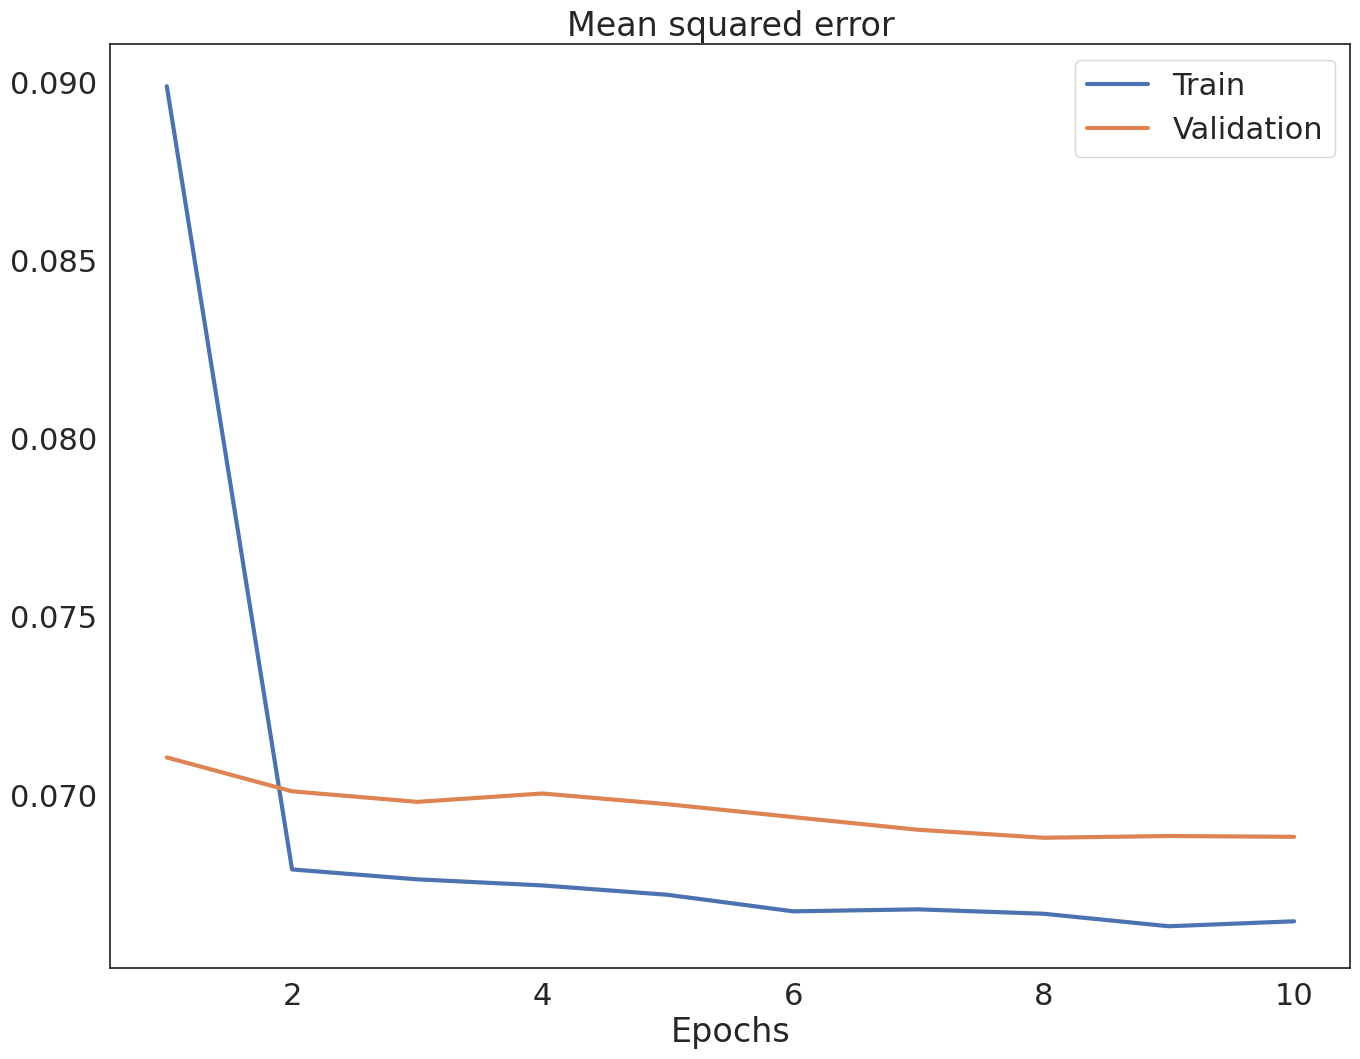

Training MSE = 0.25778956744764264
Validation MSE = 0.26234778918575624


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=2)
sns.set_style("white")


def model_analysis(history):
    # extract the training loss and validation loss values from the history object
    train_loss = history["loss"]
    val_loss = history["val_loss"]
    # x-axis values for the plot
    t = np.linspace(1, len(train_loss), len(train_loss))

    plt.figure(figsize=(16, 12))
    plt.title("Mean squared error")
    # plot the training loss and validation loss against the epoch values on the x-axis
    sns.lineplot(x=t, y=train_loss, label="Train", linewidth=3)
    sns.lineplot(x=t, y=val_loss, label="Validation", linewidth=3)
    plt.xlabel("Epochs")

    plt.legend()
    plt.savefig("FirstNet.png", dpi=400)
    plt.show()
    # the square root of the final training loss and validation loss values
    print(f"Training MSE = {np.sqrt(train_loss[-1])}")
    print(f"Validation MSE = {np.sqrt(val_loss[-1])}")


model_analysis(history)

462/462 [==============================] - 1s 1ms/step


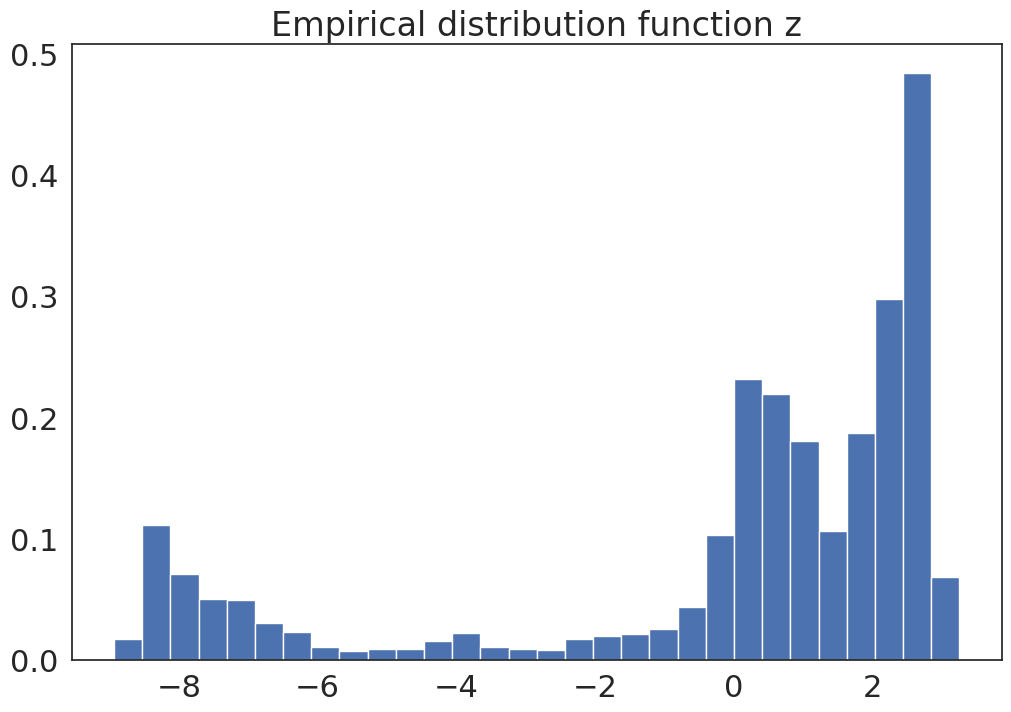

In [180]:
plt.figure(figsize=(12, 8))
plt.title("Empirical distribution function z")
plt.xticks((-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14))
# use the encoder model to obtain the latent representation (z) of the data input
plt.hist(encoder.predict(transformed_df), bins=30, density=True)
plt.savefig("DistInternal.png", dpi=400)

In [181]:
ae.predict(transformed_df)[0,:]

462/462 [==============================] - 1s 2ms/step


array([ 2.47381359e-01,  3.83769870e-01,  1.59988433e-01, -5.09466231e-03,
        4.60319787e-01,  6.43590093e-01,  6.37492537e-01, -1.23904319e-03,
       -6.49859197e-03,  8.73678029e-02,  2.77934819e-01,  3.21249604e-01,
        2.01116949e-01,  1.08644493e-01,  9.57617722e-03,  3.67381632e-01,
        6.22761548e-01,  1.00999177e-02,  3.08269978e-01,  2.58096337e-01,
        1.76660627e-01,  2.60673285e-01,  8.43949430e-03,  1.04594156e-01,
        1.98980480e-01,  2.44414136e-01,  4.43596542e-01,  1.33306049e-02,
        3.83826601e-03,  1.19882226e-02,  1.90563932e-01,  2.51472056e-01,
        6.02721460e-02,  2.41330639e-03,  4.23415601e-01,  1.10668764e-02,
        7.41072893e-02,  1.31454561e-02,  8.66408288e-01,  2.69778520e-02,
        2.45418474e-02,  4.51874495e-01,  6.99418038e-02,  1.82227403e-01,
        2.22173855e-01,  7.59068504e-02,  5.80941066e-02,  1.28898453e-02,
        8.72653961e-01,  2.29321737e-02,  2.86773667e-02,  8.62288833e-01,
        7.67109245e-02,  

462/462 [==============================] - 1s 1ms/step


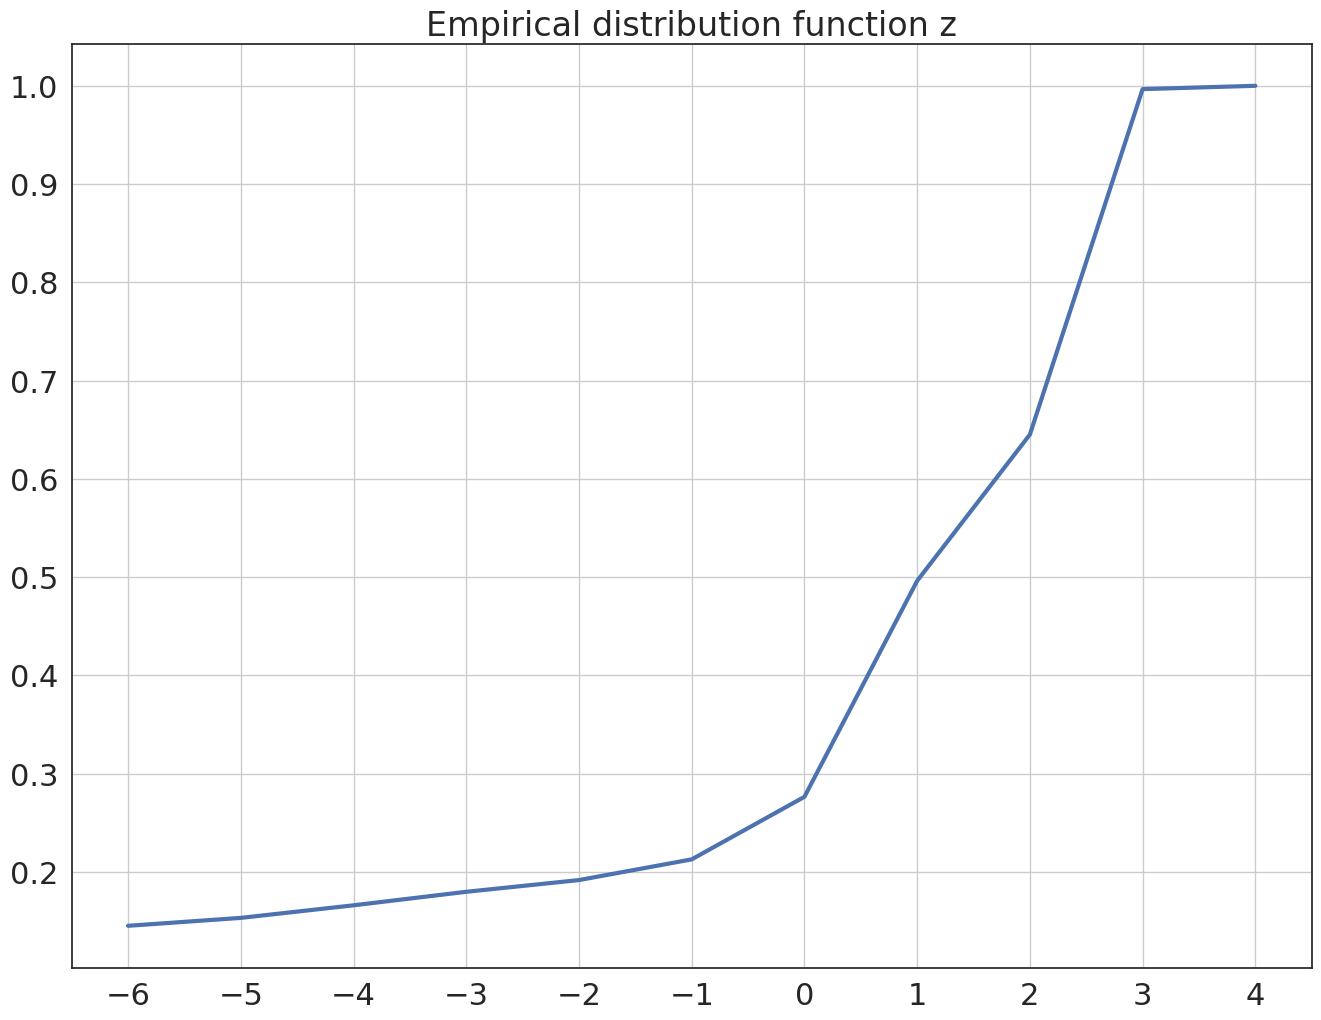

In [182]:
# plot the empirical distribution function for the values obtained from the encoder's predictions on the dataset
from statsmodels.distributions.empirical_distribution import ECDF


ecdf = ECDF(encoder.predict(transformed_df)[:, 0])
plt.figure(figsize=(16, 12))
plt.title("Empirical distribution function z")
x = (-6,-5, -4, -3, -2, -1, 0, 1, 2, 3, 4)
plt.yticks(np.linspace(0, 1, 11))
plt.xticks(x)
plt.grid()
plt.plot(x, ecdf(x), linewidth=3)
plt.savefig("EmpiricalDF.png", dpi=400)

In [183]:
from scipy.interpolate import interp1d


x = (-6,-5, -4, -3, -2, -1, 0, 1, 2, 3, 4)
# calculate the sample EDF values at the specified x-values
sample_edf_values_at_slope_changes = [ecdf(i) for i in x]
inverted_edf = interp1d(sample_edf_values_at_slope_changes, x)

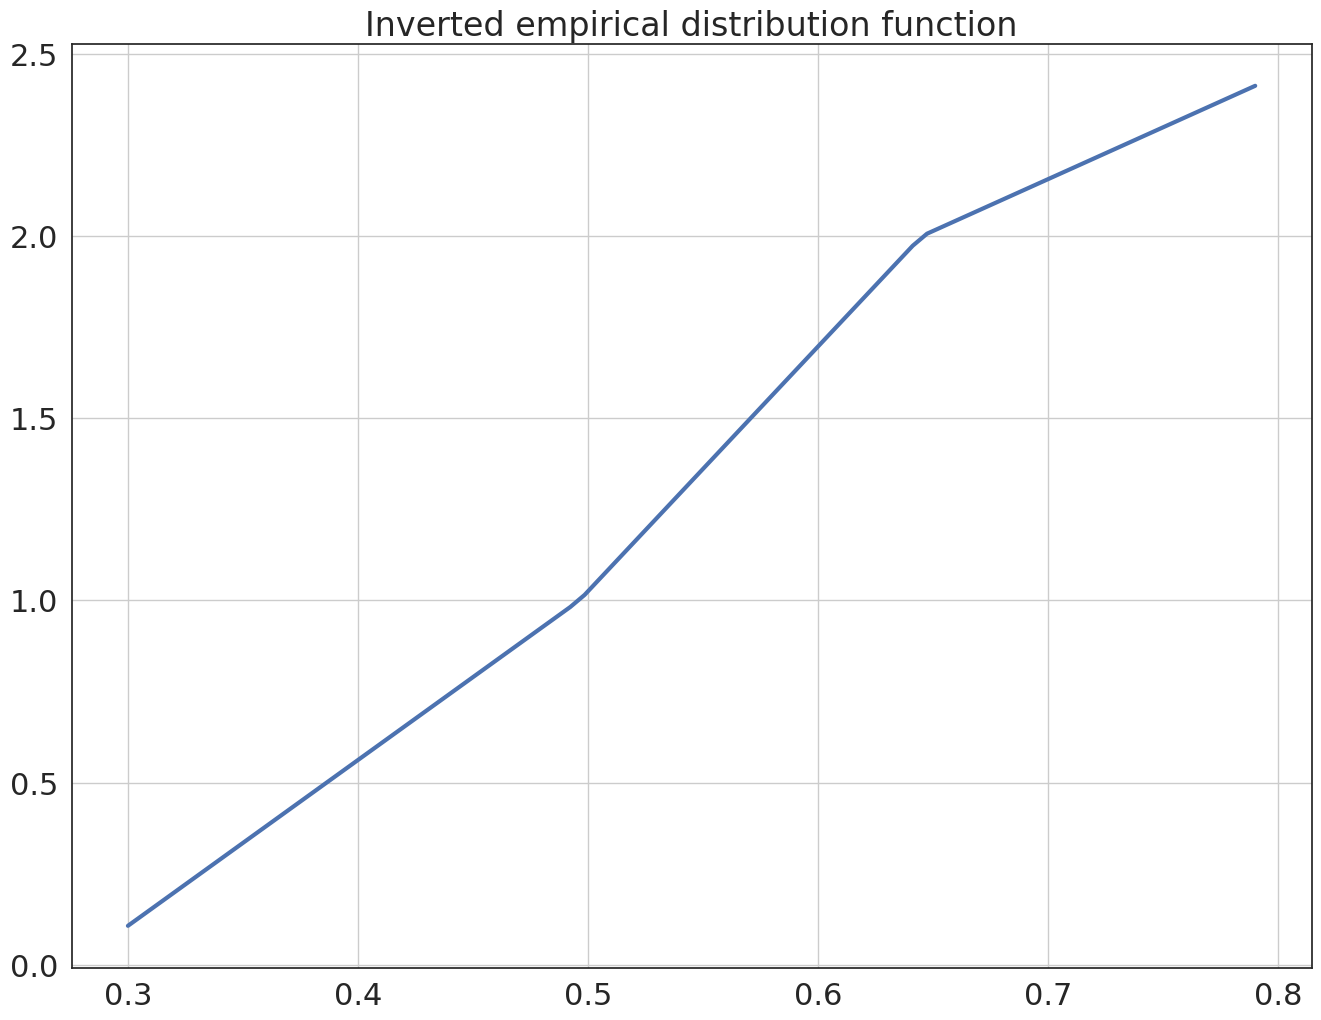

In [184]:
from numpy.random import uniform
from numpy.random import seed

# number of data points to generate
N = 10000
seed(2021)
plt.figure(figsize=(16, 12))
plt.title("Inverted empirical distribution function")
x = np.linspace(0.30, 0.79, 80)
plt.xticks(np.linspace(0, 1.0, 11))
plt.grid()
plt.plot(x, inverted_edf(x), linewidth=3)
plt.savefig("InvertedEmpiricalDF.png", dpi=400)

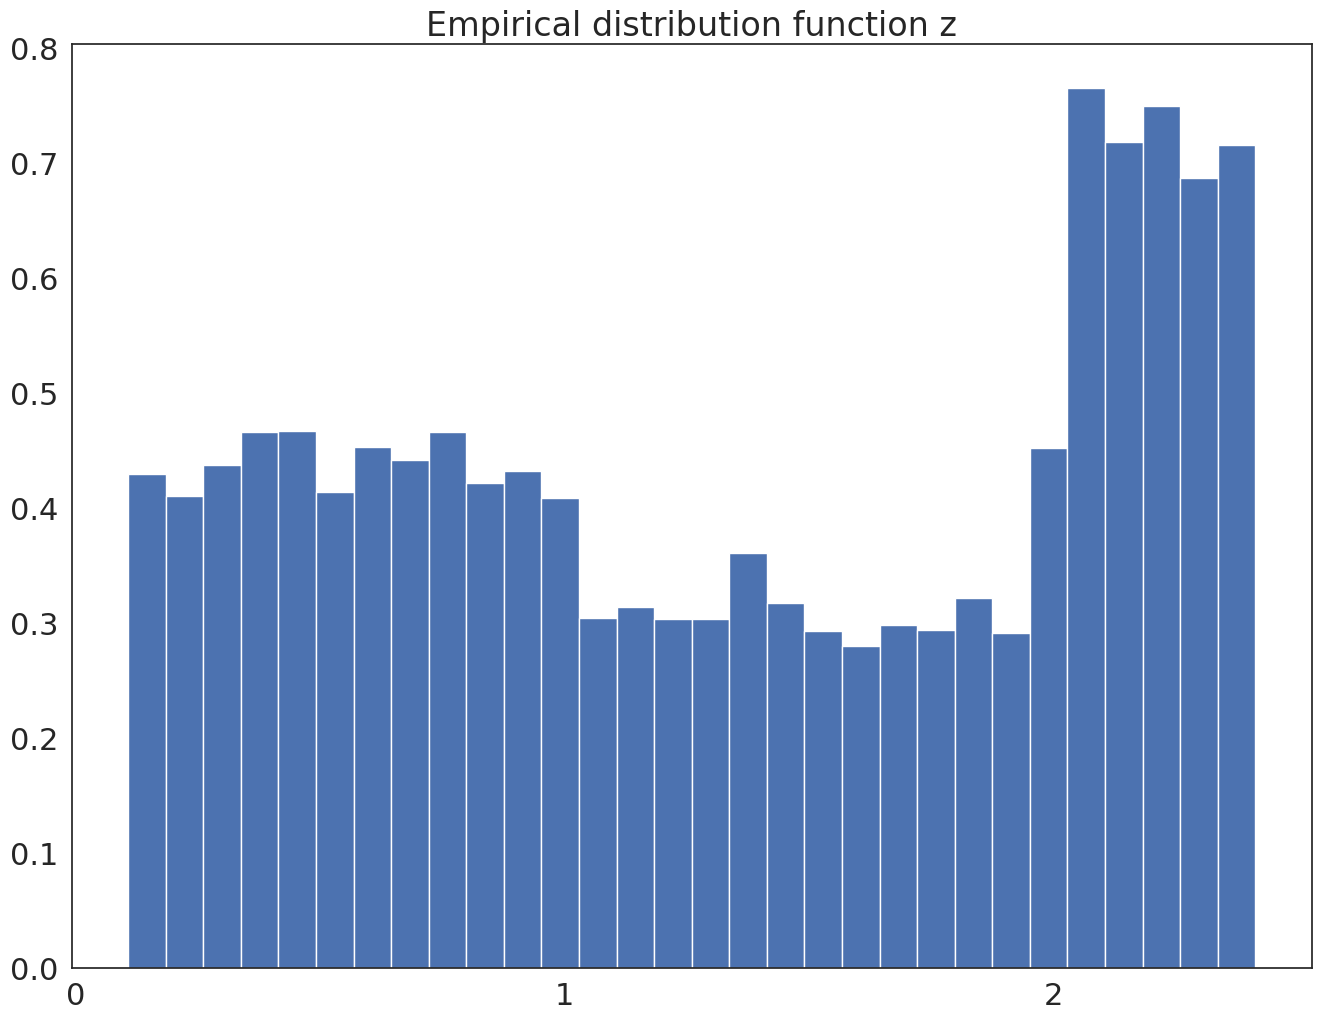

In [185]:
# number of data points to generate
N = 10000
seed(2021)
plt.figure(figsize=(16, 12))
plt.title("Empirical distribution function z")
plt.xticks((-5, -4, -3, -2, -1, 0, 1, 2, 3, 4))
# N random values from a uniform distribution are transformed to follow a specific distribution using the inverted EDF
plt.hist(inverted_edf(uniform(0.30, 0.79, N)), bins=30, density=True)
plt.savefig("DistGenerated.png", dpi=400)

462/462 [==============================] - 1s 2ms/step


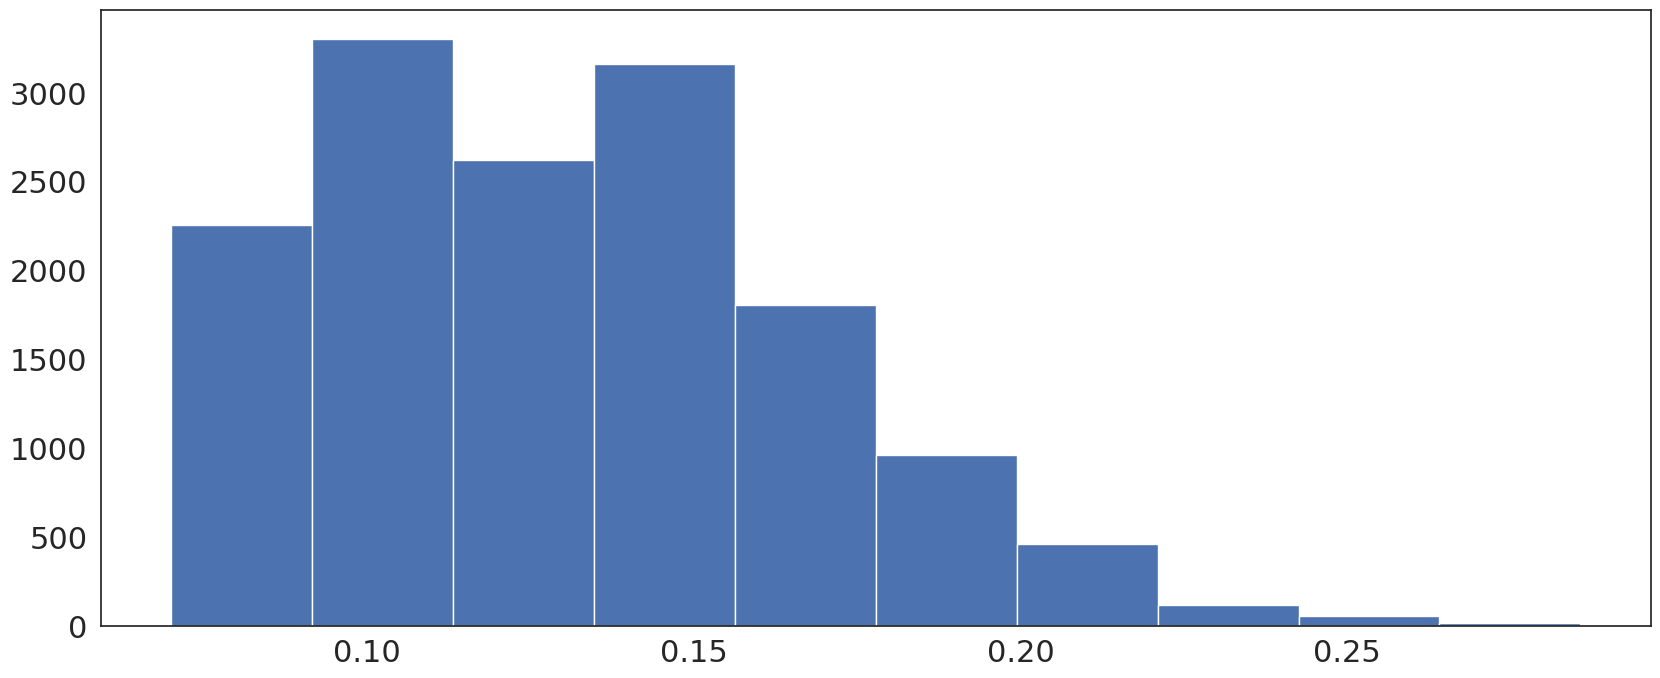

In [186]:
import tensorflow as tf

plt.figure(figsize=(20, 8))
# reconstruct the original data
normal_reconstructions = ae.predict(transformed_df)
# compute the Mean Absolute Error between the reconstructed data and the original data
normal_loss = tf.losses.mae(normal_reconstructions, transformed_df)
plt.hist(normal_loss, bins=10)
plt.show()

In [187]:
threshold = np.mean(normal_loss) + 2*np.std(normal_loss)
print(threshold)

0.20323353678917477


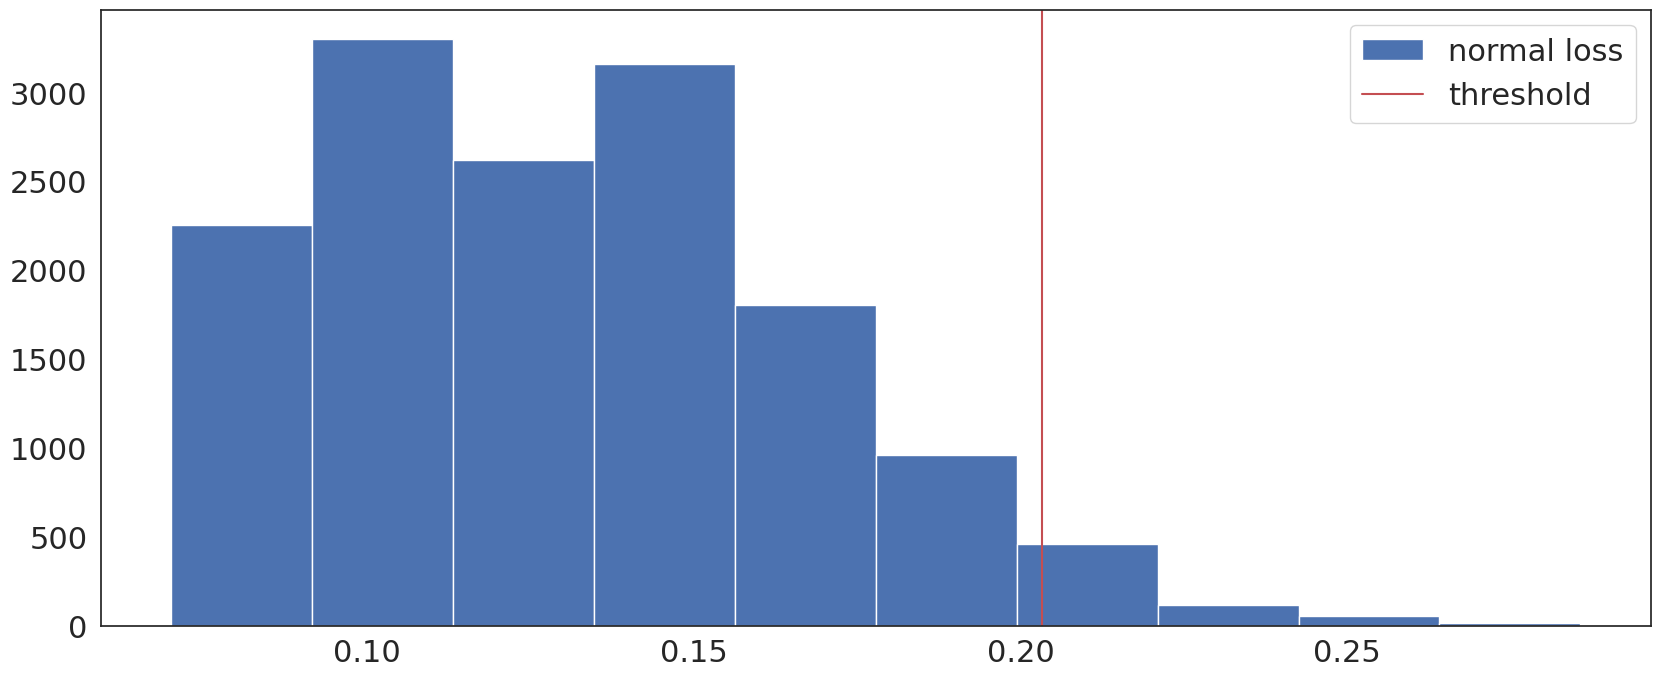

In [188]:
plt.figure(figsize=(20, 8))
plt.hist(normal_loss, bins=10, color='b', label="normal loss")
# add a vertical line to the plot at the position of the threshold value
plt.axvline(threshold, color='r', label="threshold")
plt.legend()
plt.show()

In [189]:
# Get the indices that would sort the mae array in descending order
sorted_indices = np.argsort(normal_loss)[::-1]

In [190]:
k = 100  # Number of samples to select
samples_with_high_error = transformed_df.iloc[sorted_indices[:k]]
samples_with_high_error.head()

,weight,stheight,stweight,bmi,bmipct,obese,overweight,age_12 years old or younger,age_13 years old,age_14 years old,...,qsugardrink_missing_dummy_1,food_allergies_missing_dummy_0,food_allergies_missing_dummy_1,muscle_stregthening_missing_dummy_0,muscle_stregthening_missing_dummy_1,difficulty_concentrating_missing_dummy_0,difficulty_concentrating_missing_dummy_1,qcurrentasthma_missing_dummy_1,qwheresleep_missing_dummy_1,qnbikehelmet_missing_dummy_1
2845,0.310901,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
14302,0.132592,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
29,0.638196,-1.0,-1.0,0.157129,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
7245,0.138745,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
123,0.292636,-1.0,-1.0,1.000000,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [191]:
# Find indices of tuples with reconstruction values larger than the threshold
anomaly_indices = np.where(normal_loss > threshold)[0]

# Select the corresponding tuples from the original data
anomaly_tuples = transformed_df.iloc[anomaly_indices]

# Print the anomaly tuples
anomaly_tuples.head()


,weight,stheight,stweight,bmi,bmipct,obese,overweight,age_12 years old or younger,age_13 years old,age_14 years old,...,qsugardrink_missing_dummy_1,food_allergies_missing_dummy_0,food_allergies_missing_dummy_1,muscle_stregthening_missing_dummy_0,muscle_stregthening_missing_dummy_1,difficulty_concentrating_missing_dummy_0,difficulty_concentrating_missing_dummy_1,qcurrentasthma_missing_dummy_1,qwheresleep_missing_dummy_1,qnbikehelmet_missing_dummy_1
6,0.184979,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
7,0.356232,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
12,0.211872,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
15,0.043351,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
22,0.243433,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [192]:
anomaly_tuples.shape

(559, 654)

In [193]:
# Generate the reconstructed output using the autoencoder
reconstructed_data = ae.predict(transformed_df)

# Convert the reconstructed data back to a dataframe
reconstructed_df = pd.DataFrame(reconstructed_data, columns=transformed_df.columns)

combined_df = pd.concat([transformed_df, reconstructed_df], axis=1)
combined_df.head()

462/462 [==============================] - 1s 2ms/step


,weight,stheight,stweight,bmi,bmipct,obese,overweight,age_12 years old or younger,age_13 years old,age_14 years old,...,qsugardrink_missing_dummy_1,food_allergies_missing_dummy_0,food_allergies_missing_dummy_1,muscle_stregthening_missing_dummy_0,muscle_stregthening_missing_dummy_1,difficulty_concentrating_missing_dummy_0,difficulty_concentrating_missing_dummy_1,qcurrentasthma_missing_dummy_1,qwheresleep_missing_dummy_1,qnbikehelmet_missing_dummy_1
0,0.508875,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.997379,0.932588,0.069094,0.921166,0.079978,0.930233,0.068759,0.998527,0.998399,0.999160
1,0.347927,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.989670,0.883507,0.092518,0.871231,0.108657,0.869888,0.106206,0.990015,0.994051,0.992062
2,0.142144,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.997988,0.819572,0.166138,0.818314,0.174790,0.797530,0.197725,0.996415,0.995633,0.995600
3,0.161873,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.998518,0.813569,0.172001,0.812350,0.180536,0.791693,0.203450,0.997122,0.996050,0.995917
4,0.415955,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,...,0.988603,0.876716,0.095759,0.864322,0.112625,0.861539,0.111388,0.988837,0.993449,0.991080
